In [144]:
import matplotlib.pyplot as plt
import random
import time
import numpy as np
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import train_test_split

In [145]:
def diffa(y, ypred,x):
    return (y-ypred)*(-x)

def diffb(y, ypred):
    return (y-ypred)*(-1)

def shuffle_data(x,y):
    # shuffle x，y，while keeping x_i corresponding to y_i
    seed = random.random()
    random.seed(seed)
    random.shuffle(x)
    random.seed(seed)
    random.shuffle(y)

def get_batch_data(x, y, batch):
    shuffle_data(x, y)
    x_batch = x[0:batch]
    y_batch = y[0:batch]
    return [x_batch, y_batch]

In [146]:
data = np.loadtxt('LinearRegdata.txt')
x = data[:, 1]
y = data[:, 2]
for i in range(0,5):
  print("x[",i,"] = ",x[i],",","y[",i,"] = ",y[i])

x[ 0 ] =  0.067732 , y[ 0 ] =  3.176513
x[ 1 ] =  0.42781 , y[ 1 ] =  3.816464
x[ 2 ] =  0.995731 , y[ 2 ] =  4.550095
x[ 3 ] =  0.738336 , y[ 3 ] =  4.256571
x[ 4 ] =  0.981083 , y[ 4 ] =  4.560815


In [147]:
# Normalize the data
x_max = max(x)
x_min = min(x)
y_max = max(y)
y_min = min(y)
for i in range(0, len(x)):
    x[i] = (x[i] - x_min)/(x_max - x_min)
    y[i] = (y[i] - y_min)/(y_max - y_min)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=109)

In [234]:
def batch_gd(X_train, y_train, X_test, y_test):
  a = 10.0
  b = -20.0

  all_bgdloss = []
  all_ep = []

  rate = 0.008
  start = time.time()
  for ep in range(1,100):
    loss = 0
    losst = 0
    all_da = 0
    all_db = 0
    for i in range(0, len(X_train)):
      y_pred = a*X_train[i] + b
      loss = loss + (y_train[i] - y_pred)*(y_train[i] - y_pred)/2
      all_da = all_da + diffa(y_train[i], y_pred, X_train[i]) #gradients accumulated
      all_db = all_db + diffb(y_train[i], y_pred) #gradients accumulated

    loss = loss/len(X_train)
    all_bgdloss.append(loss)
    all_ep.append(ep)

    #parameters updated
    a = a - rate * all_da
    b = b - rate * all_db

    for i in range(0, len(X_test)):
      y_pred = a*X_test[i] + b
      losst = losst + (y_test[i] - y_pred)*(y_test[i] - y_pred)/2

    #Saving best parameters for final reporting on test set   
    if ep==1:
      prevloss = losst
    else:
      if losst<prevloss:
        prevloss=losst
        param1 = a
        param2 = b
  #Complete the function to obtain the plots and RMSE
  plt.plot(all_bgdloss,all_ep)
  batch_tr_loss=all_bgdloss
  return sqrt(prevloss/len(X_test)),all_bgdloss,all_ep

In [235]:
def create_mini_batches(X, y, minibatch_size):
    minibatches = []

    for i in range(0, X.shape[0], minibatch_size):
        X_mini = X[i:i + minibatch_size]
        y_mini = y[i:i + minibatch_size]

        minibatches.append((X_mini, y_mini))

    return minibatches 

In [259]:
def minibatch_gd(X_train, y_train, X_test, y_test):
  a = 10.0
  b = -20.0

  all_bgdloss = []
  all_ep = []

  rate = 0.02
  start = time.time()
  k = 1
  for ep in range(1,100):
    minibatches = create_mini_batches(X_train, y_train, 10)
    floss=0
    for minibatch in minibatches:
      loss = 0
      losst = 0
      all_da = 0
      all_db = 0
      tx, yp = minibatch
      if(len(tx)==0):
        continue
      for i in range(0, len(tx)):
        y_pred = a*tx[i] + b
        loss = loss + (yp[i] - y_pred)*(yp[i] - y_pred)/2
        all_da = all_da + diffa(yp[i], y_pred, tx[i]) #gradients accumulated
        all_db = all_db + diffb(yp[i], y_pred) #gradients accumulated
      loss = loss/len(tx)
      #parameters updated
      a = a - rate * all_da
      b = b - rate * all_db
    for i in range(0, len(X_train)):
      y_pred = a*X_train[i] + b
      floss = floss + (y_train[i] - y_pred)*(y_train[i] - y_pred)/2
    all_bgdloss.append(floss/len(X_train))
    all_ep.append(ep)
    for i in range(0, len(X_test)):
      y_pred = a*X_test[i] + b
      losst = losst + (y_test[i] - y_pred)*(y_test[i] - y_pred)/2

    #Saving best parameters for final reporting on test set   
    if ep==1:
      prevloss = losst
    else:
      if losst<prevloss:
        prevloss=losst
        param1 = a
        param2 = b
  #Complete the function to obtain the plots and RMSE
  plt.plot(all_bgdloss,all_ep)
  minibatch_tr_loss=all_bgdloss
  return sqrt(prevloss/len(X_test)),all_bgdloss,all_ep

In [263]:
def stochastic_gd(X_train, y_train, X_test, y_test):
  a = 10.0
  b = -20.0

  all_bgdloss = []
  all_ep = []

  rate = 0.02
  start = time.time()
  k = 1
  for ep in range(1,100):
    floss=0
    for i in range(0, len(X_train)):
      loss = 0
      losst = 0
      all_da = 0
      all_db = 0
      y_pred = a*X_train[i] + b
      loss = loss + (y_train[i] - y_pred)*(y_train[i] - y_pred)/2
      all_da = all_da + diffa(y_train[i], y_pred, X_train[i]) #gradients accumulated
      all_db = all_db + diffb(y_train[i], y_pred) #gradients accumulated

      #parameters updated
      a = a - rate * all_da
      b = b - rate * all_db
    for i in range(0, len(X_train)):
      y_pred = a*X_train[i] + b
      floss = floss + (y_train[i] - y_pred)*(y_train[i] - y_pred)/2
    all_bgdloss.append(floss/len(X_train))
    all_ep.append(ep)

    for i in range(0, len(X_test)):
      y_pred = a*X_test[i] + b
      losst = losst + (y_test[i] - y_pred)*(y_test[i] - y_pred)/2

    #Saving best parameters for final reporting on test set   
    if ep==1:
      prevloss = losst
    else:
      if losst<prevloss:
        prevloss=losst
        param1 = a
        param2 = b
  #Complete the function to obtain the plots and RMSE
  plt.plot(all_bgdloss,all_ep)
  stochastic_tr_loss=all_bgdloss
  return sqrt(prevloss/len(X_test)),all_bgdloss,all_ep

In [272]:
def momentum_gd(X_train, y_train, X_test, y_test):
  a = 0
  b = 0

  all_bgdloss = []
  all_ep = []

  gamma = 0.9
  rate = 0.02
  start = time.time()
  k = 1
  v0 = 0
  v1 = 0
  for ep in range(1,100):
    floss=0
    minibatches = create_mini_batches(X_train, y_train, 10)
    for minibatch in minibatches:
      loss = 0
      losst = 0
      all_da = 0
      all_db = 0
      tx, yp = minibatch
      if(len(tx)==0):
        continue
      for i in range(0, len(tx)):
        y_pred = a*tx[i] + b
        loss = loss + (yp[i] - y_pred)*(yp[i] - y_pred)/2
        all_da = all_da + diffa(yp[i], y_pred, tx[i]) #gradients accumulated
        all_db = all_db + diffb(yp[i], y_pred) #gradients accumulated
      loss = loss/len(tx)

      #parameters updated
      v0 = gamma*v0 + rate*all_da
      v1 = gamma*v1 + rate*all_db
      a = a - v0
      b = b - v1
    for i in range(0, len(X_train)):
      y_pred = a*X_train[i] + b
      floss = floss + (y_train[i] - y_pred)*(y_train[i] - y_pred)/2
    all_bgdloss.append(floss/len(X_train))
    all_ep.append(ep)

    for i in range(0, len(X_test)):
      y_pred = a*X_test[i] + b
      losst = losst + (y_test[i] - y_pred)*(y_test[i] - y_pred)/2

    #Saving best parameters for final reporting on test set   
    if ep==1:
      prevloss = losst
    else:
      if losst<prevloss:
        prevloss=losst
        param1 = a
        param2 = b
  #Complete the function to obtain the plots and RMSE
  plt.plot(all_bgdloss,all_ep)
  momentum_tr_loss=all_bgdloss
  return sqrt(prevloss/len(X_test)),all_bgdloss,all_ep

In [273]:
def adam_gd(X_train, y_train, X_test, y_test):
  a = 0
  b = 0

  all_bgdloss = []
  all_ep = []

  gamma = 0.9
  rate = 0.2
  start = time.time()
  k = 1
  v0 = 0
  v1 = 0
  m0 = 0
  m1 = 0
  beta1 = 0.9
  beta2 = 0.999
  epsilon = 1e-8
  for ep in range(1,100):
    floss=0
    minibatches = create_mini_batches(X_train, y_train, 10)
    for minibatch in minibatches:
      loss = 0
      losst = 0
      all_da = 0
      all_db = 0
      tx, yp = minibatch
      if(len(tx)==0):
        continue
      for i in range(0, len(tx)):
        y_pred = a*tx[i] + b
        loss = loss + (yp[i] - y_pred)*(yp[i] - y_pred)/2
        all_da = all_da + diffa(yp[i], y_pred, tx[i]) #gradients accumulated
        all_db = all_db + diffb(yp[i], y_pred) #gradients accumulated
      loss = loss/len(tx)

      #parameters updated
      m0 = beta1*m0 + (1 - beta1)*all_da
      m1 = beta1*m1 + (1 - beta1)*all_db
      v0 = beta2*v0 + (1 - beta2)*(all_da**2)
      v1 = beta2*v1 + (1 - beta2)*(all_db**2)
      m_hat0 = m0/(1 - beta1**k)
      v_hat0 = v0/(1 - beta2**k)
      m_hat1 = m1/(1 - beta1**k)
      v_hat1 = v1/(1 - beta2**k)
      a = a - rate*(m_hat0/(np.sqrt(v_hat0) - epsilon))
      b = b - rate*(m_hat1/(np.sqrt(v_hat1) - epsilon))

    for i in range(0, len(X_train)):
      y_pred = a*X_train[i] + b
      floss = floss + (y_train[i] - y_pred)*(y_train[i] - y_pred)/2
    all_bgdloss.append(floss/len(X_train))
    all_ep.append(ep)

    for i in range(0, len(X_test)):
      y_pred = a*X_test[i] + b
      losst = losst + (y_test[i] - y_pred)*(y_test[i] - y_pred)/2

    #Saving best parameters for final reporting on test set   
    if ep==1:
      prevloss = losst
    else:
      if losst<prevloss:
        prevloss=losst
        param1 = a
        param2 = b
  #Complete the function to obtain the plots and RMSE
  plt.plot(all_bgdloss,all_ep)
  return sqrt(prevloss/len(X_test)),all_bgdloss,all_ep

In [274]:
rmse_loss=[]

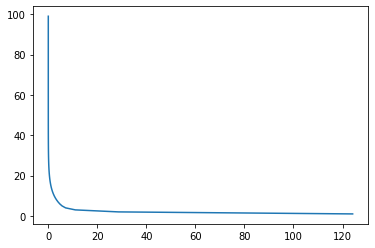

In [275]:
rmse_batch,batch_tr_loss,n_batch=batch_gd(X_train, y_train, X_test, y_test)
rmse_loss.append(rmse_batch)

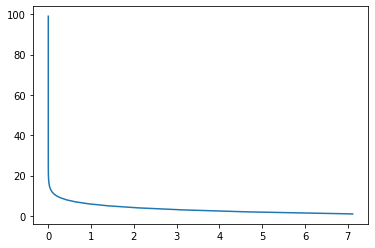

In [276]:
rmse_minibatch,minibatch_tr_loss,n_minibatch=minibatch_gd(X_train, y_train, X_test, y_test)
rmse_loss.append(rmse_minibatch)

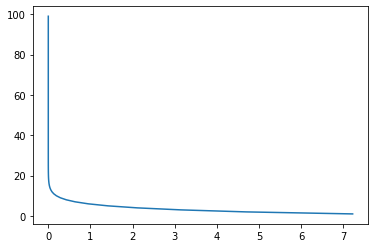

In [277]:
rmse_stochastic,stochastic_tr_loss,n_stochastic=stochastic_gd(X_train, y_train, X_test, y_test)
rmse_loss.append(rmse_stochastic)

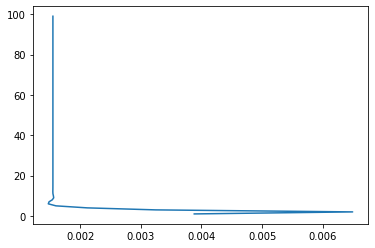

In [278]:
rmse_momentum,momentum_tr_loss,n_momentum=momentum_gd(X_train, y_train, X_test, y_test)
rmse_loss.append(rmse_momentum)

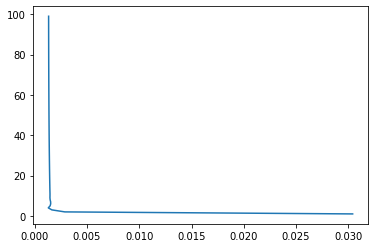

In [279]:
rmse_adam,adam_tr_loss,n_adam=adam_gd(X_train, y_train, X_test, y_test)
rmse_loss.append(rmse_adam)

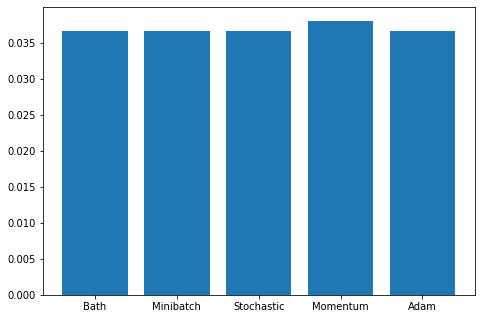

In [280]:
gd = ['Bath', 'Minibatch', 'Stochastic', 'Momentum', 'Adam']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(gd,rmse_loss)
plt.show()

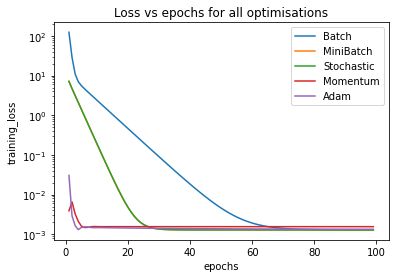

In [281]:
num_epochs=range(100)
plt.semilogy(n_batch, batch_tr_loss, label = 'Batch')
plt.semilogy(n_minibatch, minibatch_tr_loss, label = 'MiniBatch')
plt.semilogy(n_stochastic, stochastic_tr_loss, label = 'Stochastic')
plt.semilogy(n_momentum, momentum_tr_loss, label = 'Momentum')
plt.semilogy(n_adam, adam_tr_loss, label = 'Adam')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('training_loss')
plt.title('Loss vs epochs for all optimisations')
plt.show()